In [1]:
import arcgis
from arcgis.gis import GIS
from arcgis import geometry
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import pandas as pd

gis = GIS(username='xij080_ucsd5')
# this will ask for password. You can also include your password in this string
arcgis.__version__

/Users/xingyu/anaconda3/lib/python3.7/site-packages/arcgis/features/_data/geodataset/utils.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


Enter password: ········


'1.6.0'

In [2]:
%matplotlib inline 
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point




In [3]:
upload_csv1 = pd.read_csv("sd_daily_city_summary.csv")

In [4]:
upload_csv = upload_csv1.copy()

In [5]:
#drop the not useful data
unknow_index = upload_csv[upload_csv['city']=='unknown* '].index
other_index = upload_csv[upload_csv['city']=='other '].index
total_count_index = upload_csv[upload_csv['city']=='total san diego county residents '].index
new_covid_19_3 = upload_csv.drop(index = total_count_index)
new_covid_19_2 = new_covid_19_3.drop(index = other_index)
new_covid_19 = new_covid_19_2.drop(index = unknow_index)
new_covid_19
#['city'].nunique()

,date,city,confirmed_cases,percent_of_total(%)
0,2020-03-21,carlsbad,11,6.9
1,2020-03-21,chula vista,4,2.5
2,2020-03-21,del mar,2,1.3
3,2020-03-21,el cajon,2,1.3
4,2020-03-21,encinitas,4,2.5
...,...,...,...,...
314,2020-04-02,lakeside,8,0.8
315,2020-04-02,pauma valley,2,0.2
316,2020-04-02,ramona,4,0.4
317,2020-04-02,rancho santa fe,14,1.4


In [6]:
#new_covid_19.to_csv (r'sd_daily_city_summary.csv', index = False, header=True)

In [7]:
#rename column
new_covid_19 = new_covid_19.rename(columns={'city': 'Jurisdicti'})
new_covid_19 = new_covid_19.rename(columns={'date': 'Date'})
new_covid_19 = new_covid_19.rename(columns={'confirmed_cases': 'Infected'})
#change some places' name
new_covid_19['Jurisdicti'] = new_covid_19['Jurisdicti'].str.title()
new_covid_19_test = new_covid_19.sort_values(['Jurisdicti'])
new_covid_19_test['Jurisdicti'] = new_covid_19_test['Jurisdicti'].str.replace(' ', '')
new_covid_19_test

,Date,Jurisdicti,Infected,percent_of_total(%)
80,2020-03-24,Bonita,1,NaN
106,2020-03-25,Bonita,1,NaN
156,2020-03-27,Bonita,2,NaN
257,2020-03-31,Bonita,3,0.4
55,2020-03-23,Bonita,1,0.4
...,...,...,...,...
180,2020-03-28,Vista,10,1.9
283,2020-04-01,Vista,9,1.1
13,2020-03-21,Vista,2,1.3
311,2020-04-02,Vista,9,0.9


In [8]:
test1 = pd.read_csv('sd_daily_city_summary_test.csv')

In [9]:
test1.sort_values(['city'])[0:20]

,date,city,confirmed_cases,percent_of_total(%)
18,2020-04-05,Alpine,1,0.1%
52,2020-04-07,Alpine,1,0.1%
121,2020-04-14,Alpine,1,0.1%
86,2020-04-08,Alpine,1,0.1%
87,2020-04-08,Bonita,13,0.8%
122,2020-04-14,Bonita,14,0.7%
53,2020-04-07,Bonita,11,0.8%
19,2020-04-05,Bonita,8,0.6%
123,2020-04-14,Bonsall,1,0.1%
54,2020-04-07,Borrego Springs,1,0.1%


In [10]:
test2 = test1.copy()
#rename column
test2 = test2.rename(columns={'city': 'Jurisdicti'})
test2 = test2.rename(columns={'date': 'Date'})
test2 = test2.rename(columns={'confirmed_cases': 'Infected'})
#change some places' name
test2['Jurisdicti'] = test2['Jurisdicti'].str.title()
test3 = test2.sort_values(['Jurisdicti'])
test3['Jurisdicti'] = test3['Jurisdicti'].str.replace(' ', '')
test3[0:20]

,Date,Jurisdicti,Infected,percent_of_total(%)
18,2020-04-05,Alpine,1,0.1%
52,2020-04-07,Alpine,1,0.1%
121,2020-04-14,Alpine,1,0.1%
86,2020-04-08,Alpine,1,0.1%
87,2020-04-08,Bonita,13,0.8%
122,2020-04-14,Bonita,14,0.7%
53,2020-04-07,Bonita,11,0.8%
19,2020-04-05,Bonita,8,0.6%
123,2020-04-14,Bonsall,1,0.1%
54,2020-04-07,BorregoSprings,1,0.1%


In [11]:
#drop the not useful data
unknow_index_1 = test3[test3['Jurisdicti']=='unknown* '].index
other_index_1 = test3[test3['Jurisdicti']=='other '].index
total_count_index_1 = test3[test3['Jurisdicti']=='total san diego county residents '].index
new_covid_19_3_1 = test3.drop(index = total_count_index_1)
new_covid_19_2_1 = new_covid_19_3_1.drop(index = other_index_1)
test4 = new_covid_19_2_1.drop(index = unknow_index_1)
test4
#['city'].nunique()

,Date,Jurisdicti,Infected,percent_of_total(%)
18,2020-04-05,Alpine,1,0.1%
52,2020-04-07,Alpine,1,0.1%
121,2020-04-14,Alpine,1,0.1%
86,2020-04-08,Alpine,1,0.1%
87,2020-04-08,Bonita,13,0.8%
...,...,...,...,...
136,2020-04-14,ValleyCenter,3,0.2%
85,2020-04-08,Vista,26,1.6%
17,2020-04-05,Vista,21,1.5%
51,2020-04-07,Vista,22,1.5%


In [12]:
#combine the data

In [13]:
updated_dataf = pd.concat([new_covid_19_test,test3])
updated_dataf = updated_dataf.reset_index(drop = True)
updated_dataf_1 = updated_dataf.sort_values(['Jurisdicti'])
updated_dataf_1 = updated_dataf_1.reset_index(drop = True)
updated_dataf_1

,Date,Jurisdicti,Infected,percent_of_total(%)
0,2020-04-08,Alpine,1,0.1%
1,2020-04-14,Alpine,1,0.1%
2,2020-04-05,Alpine,1,0.1%
3,2020-04-07,Alpine,1,0.1%
4,2020-03-24,Bonita,1,NaN
...,...,...,...,...
432,2020-03-28,Vista,10,1.9
433,2020-04-01,Vista,9,1.1
434,2020-03-21,Vista,2,1.3
435,2020-04-07,Vista,22,1.5%


In [14]:
#for loop to sort value
#number_of_loop = new_covid_19['Jurisdicti'].nunique()
value_used = updated_dataf_1['Jurisdicti'].unique()[::-1] 
value_used
new_dataf = pd.DataFrame()
for i in value_used:
    plug_in_dataf = updated_dataf[updated_dataf['Jurisdicti']== i].sort_values(['Date'],ascending = False)
    new_dataf = pd.concat([plug_in_dataf, new_dataf], ignore_index=True)
new_dataf1 = new_dataf.sort_values(['Jurisdicti'])
updated_dataf = new_dataf.copy()
updated_dataf

,Date,Jurisdicti,Infected,percent_of_total(%)
0,2020-04-14,Alpine,1,0.1%
1,2020-04-08,Alpine,1,0.1%
2,2020-04-07,Alpine,1,0.1%
3,2020-04-05,Alpine,1,0.1%
4,2020-04-14,Bonita,14,0.7%
...,...,...,...,...
432,2020-03-25,Vista,3,NaN
433,2020-03-24,Vista,2,NaN
434,2020-03-23,Vista,2,0.9
435,2020-03-22,Vista,2,1


In [15]:
#add required other column to the data
additional_information = pd.read_csv('points_Mar21_apr1_1column.csv')
selected = additional_information[['Jurisdicti','POINT_X','POINT_Y']]
selected

,Jurisdicti,POINT_X,POINT_Y
0,Bonita,-117.015352,32.671693
1,Bonita,-117.015352,32.671693
2,Bonita,-117.015352,32.671693
3,Bonita,-117.015352,32.671693
4,Bonita,-117.015352,32.671693
...,...,...,...
312,San Clemente,-117.571509,33.390039
313,Santa Ysabel,-116.715852,33.188958
314,Tecate,-116.660200,32.586232
315,Valley Center,-117.001448,33.246626


In [16]:
copy_selected = selected.copy()
copy_selected['Jurisdicti'] = copy_selected['Jurisdicti'].str.title()
copy_selected['Jurisdicti'] = copy_selected['Jurisdicti'].str.replace(' ', '')


In [17]:
copy_selected_final = copy_selected.drop_duplicates()
copy_selected_final.reset_index(drop = True)
#x
POINT_X = copy_selected_final.set_index('Jurisdicti')['POINT_X'].to_dict()
POINT_X
#y
POINT_Y = copy_selected_final.set_index('Jurisdicti')['POINT_Y'].to_dict()




In [18]:
updated_dataf[0:20]

,Date,Jurisdicti,Infected,percent_of_total(%)
0,2020-04-14,Alpine,1,0.1%
1,2020-04-08,Alpine,1,0.1%
2,2020-04-07,Alpine,1,0.1%
3,2020-04-05,Alpine,1,0.1%
4,2020-04-14,Bonita,14,0.7%
5,2020-04-08,Bonita,13,0.8%
6,2020-04-07,Bonita,11,0.8%
7,2020-04-05,Bonita,8,0.6%
8,2020-04-02,Bonita,6,0.6
9,2020-04-01,Bonita,6,0.7


In [19]:
updated_dataf['POINT_X'] = updated_dataf['Jurisdicti']
updated_dataf['POINT_Y'] = updated_dataf['Jurisdicti']
updated_dataf
updated_dataf.replace({"POINT_X": POINT_X})
updated_dataf["POINT_X"].replace(POINT_X, inplace=True)
updated_dataf["POINT_Y"].replace(POINT_Y, inplace=True)
#final version of updated data
updated_dataf

,Date,Jurisdicti,Infected,percent_of_total(%),POINT_X,POINT_Y
0,2020-04-14,Alpine,1,0.1%,-116.696,32.8056
1,2020-04-08,Alpine,1,0.1%,-116.696,32.8056
2,2020-04-07,Alpine,1,0.1%,-116.696,32.8056
3,2020-04-05,Alpine,1,0.1%,-116.696,32.8056
4,2020-04-14,Bonita,14,0.7%,-117.015,32.6717
...,...,...,...,...,...,...
432,2020-03-25,Vista,3,NaN,-117.219,33.2064
433,2020-03-24,Vista,2,NaN,-117.219,33.2064
434,2020-03-23,Vista,2,0.9,-117.219,33.2064
435,2020-03-22,Vista,2,1,-117.219,33.2064


In [25]:
#change those place without space to with space
list_place_with_space = []
for i in city_with_zip['Jurisdicti'].unique():
    if ' ' in i:
        list_place_with_space.append(i)


In [26]:
# #list need to be change
list_place_with_nospace = []
for i in list_place_with_space:
    list_place_with_nospace.append(i.replace(' ',''))


In [27]:
dictionary_for_change = {}

dictionary_for_change = {list_place_with_nospace[i]: list_place_with_space[i] for i in range(len(list_place_with_space))} 





In [28]:
updated_dataf = updated_dataf.replace({'Jurisdicti': dictionary_for_change})

In [29]:
updated_dataf

,Date,Jurisdicti,Infected,percent_of_total(%),POINT_X,POINT_Y
0,2020-04-14,Alpine,1,0.1%,-116.696,32.8056
1,2020-04-08,Alpine,1,0.1%,-116.696,32.8056
2,2020-04-07,Alpine,1,0.1%,-116.696,32.8056
3,2020-04-05,Alpine,1,0.1%,-116.696,32.8056
4,2020-04-14,Bonita,14,0.7%,-117.015,32.6717
...,...,...,...,...,...,...
432,2020-03-25,Vista,3,NaN,-117.219,33.2064
433,2020-03-24,Vista,2,NaN,-117.219,33.2064
434,2020-03-23,Vista,2,0.9,-117.219,33.2064
435,2020-03-22,Vista,2,1,-117.219,33.2064


In [20]:
#merge geometry feature to the dataframe

In [21]:
polyly=gis.content.get('55ae7b83821947618ed692f6de4fe8c8')

In [22]:
poly=pd.DataFrame.spatial.from_layer(polyly.layers[0])

/Users/xingyu/anaconda3/lib/python3.7/site-packages/arcgis/features/layer.py:1423: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  "esriFieldTypeDate" : pd.datetime,


In [23]:
# merge city name with zipcode
city = poly[['COom_adj','SHAPE']]
sd_zipcode = gis.content.get("1fa5dfbe76e5485faa90bdfed3a246c8")
sd_zipcode_sdf = pd.DataFrame.spatial.from_layer(sd_zipcode.layers[0])
zipcode = sd_zipcode_sdf[['ZIP','SHAPE','COMMUNITY']]

c = city['COom_adj'].unique()
z = zipcode['COMMUNITY'].unique()


In [24]:

city = city.rename(columns={'COom_adj':'COMMUNITY'})
city_with_zip = city.merge(zipcode, on='COMMUNITY')
city_with_zip = city_with_zip.drop('SHAPE_y',axis = 1)
city_with_zip = city_with_zip.rename(columns = {'SHAPE_x':'SHAPE'})
city_with_zip=city_with_zip.rename(columns={'COMMUNITY':'city'})
city_with_zip = city_with_zip.rename(columns={'city': 'Jurisdicti'})
city_with_zip = city_with_zip.drop(['ZIP'],axis = 1)
city_with_zip

,Jurisdicti,SHAPE
0,Bonita,"{'rings': [[[-13022166.3169882, 3853307.240272..."
1,Carlsbad,"{'rings': [[[-13053082.0181245, 3916226.877610..."
2,Carlsbad,"{'rings': [[[-13053082.0181245, 3916226.877610..."
3,Carlsbad,"{'rings': [[[-13053082.0181245, 3916226.877610..."
4,Carlsbad,"{'rings': [[[-13053082.0181245, 3916226.877610..."
...,...,...
114,San Clemente,"{'rings': [[[-13085491.121395, 3944300.1314619..."
115,Santa Ysabel,"{'rings': [[[-12995942.7433368, 3934927.150922..."
116,Tecate,"{'rings': [[[-12979068.32321, 3839581.76075874..."
117,Valley Center,"{'rings': [[[-13030101.1207988, 3939664.017618..."


In [30]:
update_final_version = updated_dataf.merge(city_with_zip, on = ['Jurisdicti'])

In [31]:
#conver the final version of updated data to csv file
update_final_version = update_final_version.drop_duplicates()
update_final_version

,Date,Jurisdicti,Infected,percent_of_total(%),POINT_X,POINT_Y,SHAPE
0,2020-04-14,Alpine,1,0.1%,-116.696,32.8056,"{'rings': [[[-12996038.8672231, 3890080.229409..."
1,2020-04-08,Alpine,1,0.1%,-116.696,32.8056,"{'rings': [[[-12996038.8672231, 3890080.229409..."
2,2020-04-07,Alpine,1,0.1%,-116.696,32.8056,"{'rings': [[[-12996038.8672231, 3890080.229409..."
3,2020-04-05,Alpine,1,0.1%,-116.696,32.8056,"{'rings': [[[-12996038.8672231, 3890080.229409..."
4,2020-04-14,Bonita,14,0.7%,-117.015,32.6717,"{'rings': [[[-13022166.3169882, 3853307.240272..."
...,...,...,...,...,...,...,...
1411,2020-03-25,Vista,3,NaN,-117.219,33.2064,"{'rings': [[[-13048372.3580443, 3930861.965936..."
1415,2020-03-24,Vista,2,NaN,-117.219,33.2064,"{'rings': [[[-13048372.3580443, 3930861.965936..."
1419,2020-03-23,Vista,2,0.9,-117.219,33.2064,"{'rings': [[[-13048372.3580443, 3930861.965936..."
1423,2020-03-22,Vista,2,1,-117.219,33.2064,"{'rings': [[[-13048372.3580443, 3930861.965936..."


In [32]:
#conver the final version of updated data to csv file
update_final_version.to_csv (r'sd_daily_city_summary_updated.csv', index = False, header=True)

In [33]:
import numpy as np

In [34]:
shp_path = "sd_daily_city_summary_updated.csv"
shp_properties = {'title':'updating data for CoVID-19 everyday', 'tags':'covid19'}
updating = gis.content.add(item_properties = shp_properties, data=shp_path)
updating.share(everyone=True)

{'results': [{'itemId': 'ce5b1980bcf24d50a08c03923c9bd5ce',
   'success': True,
   'notSharedWith': []}]}

In [35]:
update_final_version.set_geometry('SHAPE')

,Date,Jurisdicti,Infected,percent_of_total(%),POINT_X,POINT_Y,SHAPE
0,2020-04-14,Alpine,1,0.1%,-116.696,32.8056,"MULTIPOLYGON (((-12996038.867 3890080.229, -12..."
1,2020-04-08,Alpine,1,0.1%,-116.696,32.8056,"MULTIPOLYGON (((-12996038.867 3890080.229, -12..."
2,2020-04-07,Alpine,1,0.1%,-116.696,32.8056,"MULTIPOLYGON (((-12996038.867 3890080.229, -12..."
3,2020-04-05,Alpine,1,0.1%,-116.696,32.8056,"MULTIPOLYGON (((-12996038.867 3890080.229, -12..."
4,2020-04-14,Bonita,14,0.7%,-117.015,32.6717,"MULTIPOLYGON (((-13022166.317 3853307.240, -13..."
...,...,...,...,...,...,...,...
1411,2020-03-25,Vista,3,NaN,-117.219,33.2064,"MULTIPOLYGON (((-13048372.358 3930861.966, -13..."
1415,2020-03-24,Vista,2,NaN,-117.219,33.2064,"MULTIPOLYGON (((-13048372.358 3930861.966, -13..."
1419,2020-03-23,Vista,2,0.9,-117.219,33.2064,"MULTIPOLYGON (((-13048372.358 3930861.966, -13..."
1423,2020-03-22,Vista,2,1,-117.219,33.2064,"MULTIPOLYGON (((-13048372.358 3930861.966, -13..."


In [36]:

update_final_version[update_final_version['Date'] == '2020-03-23']

,Date,Jurisdicti,Infected,percent_of_total(%),POINT_X,POINT_Y,SHAPE
18,2020-03-23,Bonita,1,0.4,-117.015,32.6717,"{'rings': [[[-13022166.3169882, 3853307.240272..."
82,2020-03-23,Carlsbad,14,6.1,-117.283,33.1244,"{'rings': [[[-13053082.0181245, 3916226.877610..."
164,2020-03-23,Chula Vista,6,2.6,-116.984,32.6288,"{'rings': [[[-13018505.2168385, 3853364.165457..."
232,2020-03-23,Del Mar,5,2.2,-117.257,32.9576,"{'rings': [[[-13048633.6831031, 3892747.514411..."
278,2020-03-23,El Cajon,7,3,-116.902,32.7927,"{'rings': [[[-13006128.7080638, 3880292.463117..."
301,2020-03-23,Encinitas,5,2.2,-117.247,33.0428,"{'rings': [[[-13047363.3872105, 3907906.432499..."
360,2020-03-23,Escondido,5,2.2,-117.003,33.123,"{'rings': [[[-13038167.539891, 3939469.4189864..."
386,2020-03-23,Fallbrook,2,0.9,-117.177,33.3748,"{'rings': [[[-13078812.156924, 3962537.3270725..."
431,2020-03-23,La Mesa,1,0.4,-117.007,32.7679,"{'rings': [[[-13023220.594465, 3868124.8085765..."
449,2020-03-23,Lakeside,2,0.9,-116.872,32.9132,"{'rings': [[[-13005525.3117984, 3893096.880886..."


In [44]:
sdf = pd.DataFrame.spatial.from_xy(update_final_version,x_column = 'POINT_X', y_column='POINT_Y')
sdf[0:20]

,Date,Jurisdicti,Infected,percent_of_total(%),POINT_X,POINT_Y,SHAPE
0,2020-04-14,Alpine,1,0.1%,-116.696,32.8056,"{'x': -116.6955435, 'y': 32.80562474, 'spatial..."
1,2020-04-08,Alpine,1,0.1%,-116.696,32.8056,"{'x': -116.6955435, 'y': 32.80562474, 'spatial..."
2,2020-04-07,Alpine,1,0.1%,-116.696,32.8056,"{'x': -116.6955435, 'y': 32.80562474, 'spatial..."
3,2020-04-05,Alpine,1,0.1%,-116.696,32.8056,"{'x': -116.6955435, 'y': 32.80562474, 'spatial..."
4,2020-04-14,Bonita,14,0.7%,-117.015,32.6717,"{'x': -117.01535190000001, 'y': 32.67169292, '..."
5,2020-04-08,Bonita,13,0.8%,-117.015,32.6717,"{'x': -117.01535190000001, 'y': 32.67169292, '..."
6,2020-04-07,Bonita,11,0.8%,-117.015,32.6717,"{'x': -117.01535190000001, 'y': 32.67169292, '..."
7,2020-04-05,Bonita,8,0.6%,-117.015,32.6717,"{'x': -117.01535190000001, 'y': 32.67169292, '..."
8,2020-04-02,Bonita,6,0.6,-117.015,32.6717,"{'x': -117.01535190000001, 'y': 32.67169292, '..."
9,2020-04-01,Bonita,6,0.7,-117.015,32.6717,"{'x': -117.01535190000001, 'y': 32.67169292, '..."


In [38]:
import datetime

In [39]:
sdf1 = sdf.replace(np.nan, '0', regex=True)

sdf1['Date'] = pd.to_datetime(sdf1['Date'])
sdf1

,Date,Jurisdicti,Infected,percent_of_total(%),POINT_X,POINT_Y,SHAPE
0,2020-04-14,Alpine,1,0.1%,-116.695543,32.805625,"{'x': -116.6955435, 'y': 32.80562474, 'spatial..."
1,2020-04-08,Alpine,1,0.1%,-116.695543,32.805625,"{'x': -116.6955435, 'y': 32.80562474, 'spatial..."
2,2020-04-07,Alpine,1,0.1%,-116.695543,32.805625,"{'x': -116.6955435, 'y': 32.80562474, 'spatial..."
3,2020-04-05,Alpine,1,0.1%,-116.695543,32.805625,"{'x': -116.6955435, 'y': 32.80562474, 'spatial..."
4,2020-04-14,Bonita,14,0.7%,-117.015352,32.671693,"{'x': -117.01535190000001, 'y': 32.67169292, '..."
...,...,...,...,...,...,...,...
1411,2020-03-25,Vista,3,0,-117.219472,33.206427,"{'x': -117.2194718, 'y': 33.20642738, 'spatial..."
1415,2020-03-24,Vista,2,0,-117.219472,33.206427,"{'x': -117.2194718, 'y': 33.20642738, 'spatial..."
1419,2020-03-23,Vista,2,0.9,-117.219472,33.206427,"{'x': -117.2194718, 'y': 33.20642738, 'spatial..."
1423,2020-03-22,Vista,2,1,-117.219472,33.206427,"{'x': -117.2194718, 'y': 33.20642738, 'spatial..."


In [42]:
sdf1['Infected'] = sdf1['Infected'].astype(int)

In [43]:
sdf1.spatial.to_featurelayer(title="test_feature_layer",gis=gis,tags="covid19")


<Item title:"test_feature_layer" type:Feature Layer Collection owner:xij080_ucsd5>

In [ ]:
#get the hospital

In [45]:
hospital_point = gis.content.get('4bc37e83090a40a887c53cbeeba7a236')

<Item title:"SD_HIFLD_Hospitals" type:Feature Layer Collection owner:izaslavsky_ucsd>
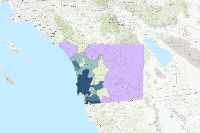

In [46]:
hospital_point

In [49]:
hospital_sdf = pd.DataFrame.spatial.from_layer(hospital_point.layers[0])

/Users/xingyu/anaconda3/lib/python3.7/site-packages/arcgis/features/layer.py:1423: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  "esriFieldTypeDate" : pd.datetime,


In [50]:
hospital_sdf.spatial.to_featurelayer(title="hospital_feature_layer",gis=gis,tags="covid19")

<Item title:"hospital_feature_layer" type:Feature Layer Collection owner:xij080_ucsd5>